In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

#mogrify -strip ./*.jpg


     |████████████████████████████████| 720 kB 5.0 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 50.6 MB/s 
     |████████████████████████████████| 186 kB 60.5 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 51 kB 337 kB/s 
Mounted at /content/gdrive


In [ ]:
path=Path("/content/gdrive/MyDrive/data/esp32cam/train")

In [ ]:
fns = get_image_files(path)
fns

(#2741) [Path('/content/gdrive/MyDrive/data/esp32cam/train/papa;meko/IMG_20181010_202420694_BURST000_COVER_TOP-ANIMATION.gif'),Path('/content/gdrive/MyDrive/data/esp32cam/train/papa;meko/IMG_20181010_202433249.jpg'),Path('/content/gdrive/MyDrive/data/esp32cam/train/papa;meko/IMG_20181010_202430780.jpg'),Path('/content/gdrive/MyDrive/data/esp32cam/train/papa;meko/IMG_20181010_202420694_BURST000_COVER_TOP.jpg'),Path('/content/gdrive/MyDrive/data/esp32cam/train/papa;meko/DSC_0032.jpg'),Path('/content/gdrive/MyDrive/data/esp32cam/train/papa;meko/IMG_20181010_202435639.jpg'),Path('/content/gdrive/MyDrive/data/esp32cam/train/papa;meko/IMG_20181010_202422881.jpg'),Path('/content/gdrive/MyDrive/data/esp32cam/train/papa;meko/IMG_20200220_183806.jpg'),Path('/content/gdrive/MyDrive/data/esp32cam/train/papa;meko/IMG_20181010_202439563_BURST000_COVER_TOP.jpg'),Path('/content/gdrive/MyDrive/data/esp32cam/train/papa;meko/IMG_20200220_183808.jpg')...]

In [ ]:
failed = verify_images(fns)
len(failed)

0

In [ ]:
failed.map(Path.unlink);

In [ ]:
def get_ys(r): 
  return (r.parent.name).split(';')
#return (r.parent.name).split(' ')
bears = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_ys,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [ ]:
dls = bears.dataloaders(path)

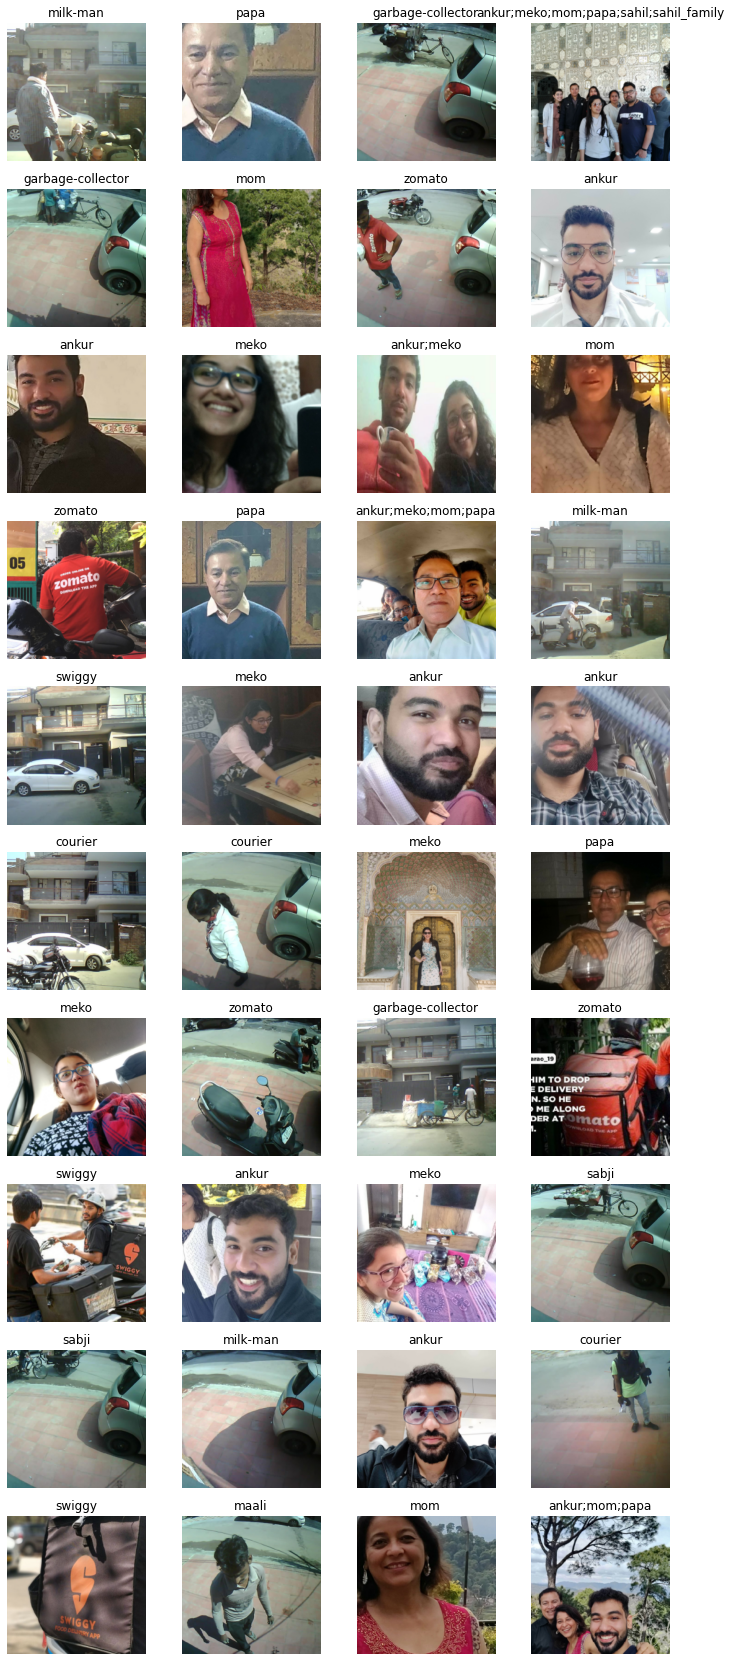

In [ ]:
dls.valid.show_batch(max_n=40, nrows=10)

In [ ]:
dls.vocab

['ankur', 'chandan', 'courier', 'dhobi', 'ekam', 'garbage-collector', 'goldy-maam', 'maali', 'meko', 'milk-man', 'mom', 'papa', 'parkash', 'sabji', 'sahil', 'sahil_family', 'sanket', 'swiggy', 'zomato']

In [ ]:
from fastai.callback.fp16 import *
learn2 = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
#learn2.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
import pickle
filename = 'finalized_model_enhanced2.sav'
pickle.dump(learn2, open('/content/drive/MyDrive/data/esp32cam/'+filename, 'wb'))


In [ ]:
lr_min,lr_steep = learn.lr_find()

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 4.79e-04


In [ ]:
learn.fit_one_cycle(3,5.75e-04)

epoch,train_loss,valid_loss,error_rate,time
0,2.493082,0.672746,0.221831,02:55
1,1.465092,0.310642,0.102113,01:52
2,1.014735,0.275924,0.088028,01:52


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=1.3182567499825382e-06)

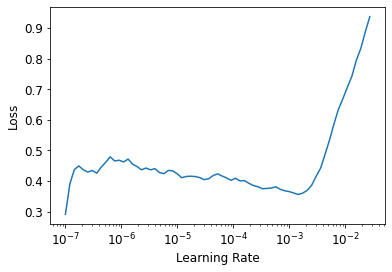

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=slice(6.91e-5,7e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.467439,0.197787,0.059859,01:55
1,0.404304,0.291974,0.088028,01:54
2,0.311901,0.152461,0.045775,01:54
3,0.226095,0.126933,0.031690,01:55
4,0.180569,0.137220,0.045775,01:53
5,0.141448,0.122816,0.038732,01:54


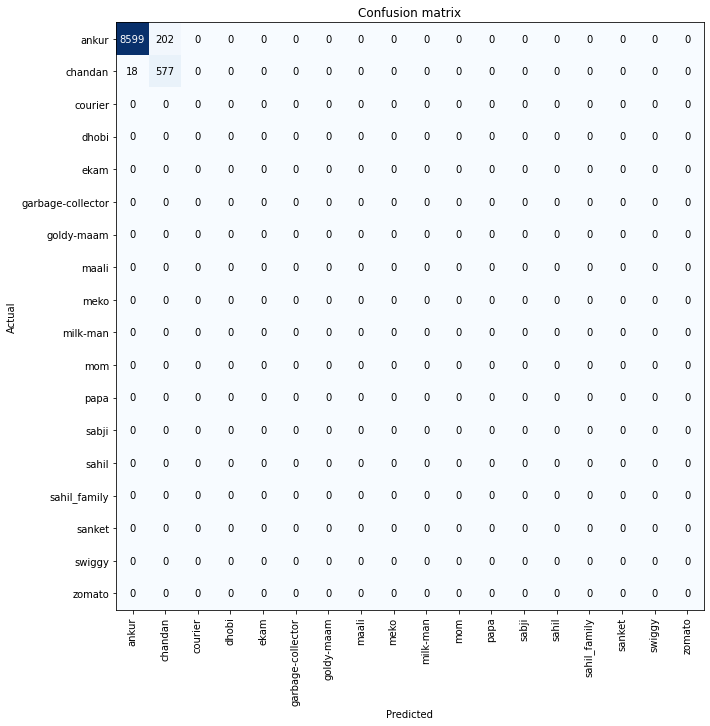

In [ ]:
interp = ClassificationInterpretation.from_learner(learn )  
#fig, ax = plt.subplots(figsize=(10, 10))
interp.plot_confusion_matrix(figsize=(10, 10))

,target,predicted,probabilities,loss
0,mom,ankur;mom,"TensorBase([1.0000, 0.3038, 0.2796, 0.2130, 0.2756, 0.1463, 0.2288, 0.2864, 0.2518, 0.3296, 0.8171, 0.1204, 0.0269, 0.3682, 0.2638, 0.2101, 0.2828, 0.0614])",1.760369062423706
1,swiggy,swiggy;zomato,"TensorBase([0.0050, 0.4726, 0.3259, 0.4632, 0.3392, 0.2723, 0.3171, 0.3095, 0.0734, 0.2891, 0.0518, 0.0940, 0.1493, 0.2328, 0.2397, 0.2634, 0.8391, 1.0000])",1.1053773164749146
2,papa,meko,"TensorBase([0.0172, 0.3355, 0.4044, 0.4426, 0.3154, 0.3305, 0.2724, 0.2249, 1.0000, 0.2871, 0.0786, 0.0983, 0.1076, 0.2485, 0.4039, 0.3176, 0.3680, 0.1738])",1.0651432275772095
3,mom,chandan;meko;mom,"TensorBase([0.1925, 0.5576, 0.2876, 0.4360, 0.3661, 0.2145, 0.3840, 0.2763, 0.9993, 0.2819, 0.6477, 0.2990, 0.2258, 0.4724, 0.3164, 0.2381, 0.2295, 0.1366])",0.7649624943733215
4,ankur,ankur;goldy-maam;papa,"TensorBase([1.0000, 0.2496, 0.3186, 0.3123, 0.3297, 0.2981, 0.5849, 0.4273, 0.0375, 0.3118, 0.0774, 0.9988, 0.0600, 0.4232, 0.3718, 0.3673, 0.2208, 0.0615])",0.6846209168434143
5,ekam;goldy-maam,dhobi;ekam;goldy-maam;sabji;sahil,"TensorBase([0.0423, 0.4555, 0.4363, 0.6169, 0.6825, 0.2756, 0.5363, 0.3614, 0.1716, 0.3646, 0.2783, 0.1030, 0.9931, 0.5192, 0.3186, 0.3323, 0.2045, 0.3723])",0.6794697642326355
6,ankur;meko;mom;papa,papa,"TensorBase([0.0172, 0.3767, 0.3945, 0.2642, 0.2621, 0.3633, 0.2142, 0.2147, 0.2370, 0.1607, 0.1985, 1.0000, 0.1216, 0.3627, 0.3897, 0.4321, 0.3269, 0.0313])",0.6599215269088745
7,mom;papa,meko;mom;papa,"TensorBase([0.1965, 0.3572, 0.4718, 0.4316, 0.4812, 0.3884, 0.3511, 0.4052, 0.9798, 0.4400, 0.6815, 0.9014, 0.1667, 0.4482, 0.4276, 0.3291, 0.3282, 0.1342])",0.6226709485054016
8,ankur,ekam;mom;papa;sahil,"TensorBase([0.2513, 0.4694, 0.3538, 0.2918, 0.5340, 0.2258, 0.2981, 0.4126, 0.4247, 0.4145, 0.6146, 0.6728, 0.2561, 0.7370, 0.4114, 0.4268, 0.3310, 0.0877])",0.6151289343833923
9,meko,ankur;meko,"TensorBase([0.9954, 0.3106, 0.3429, 0.2328, 0.3710, 0.3131, 0.2878, 0.2957, 0.6423, 0.2957, 0.3465, 0.2043, 0.1086, 0.2916, 0.3793, 0.2787, 0.2544, 0.0959])",0.6148204207420349


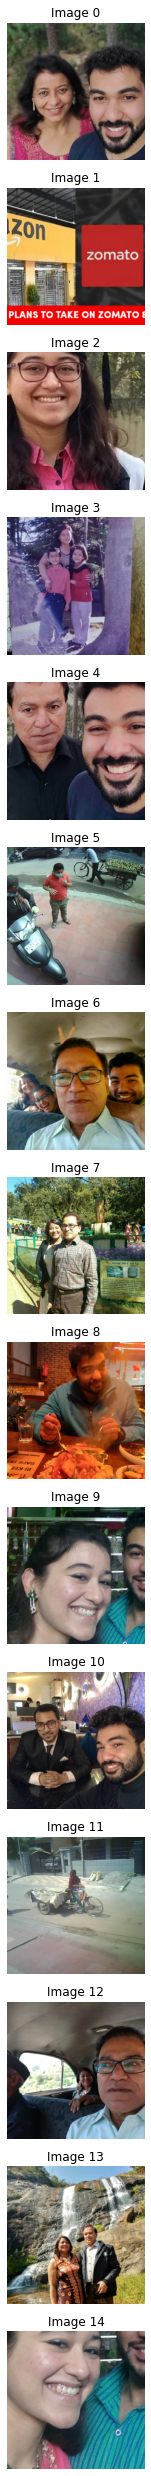

In [ ]:
interp.plot_top_losses(15, nrows=15)

In [ ]:
import pickle
filename = 'finalized_model_enhanced3.sav'
pickle.dump(learn, open('/content/drive/MyDrive/data/esp32cam/'+filename, 'wb'))


In [ ]:
path.ls()

(#7) [Path('/content/gdrive/MyDrive/data/esp32cam/data/ankur'),Path('/content/gdrive/MyDrive/data/esp32cam/data/zomato'),Path('/content/gdrive/MyDrive/data/esp32cam/data/swiggy'),Path('/content/gdrive/MyDrive/data/esp32cam/data/mom'),Path('/content/gdrive/MyDrive/data/esp32cam/data/papa'),Path('/content/gdrive/MyDrive/data/esp32cam/data/meko'),Path('/content/gdrive/MyDrive/data/esp32cam/data/finalized_model.sav')]

In [ ]:
#loaded_model = joblib.load(filename)

In [ ]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

In [ ]:
preds,targs = learn.get_preds()

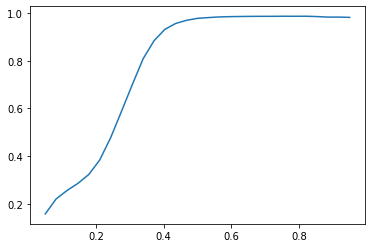

In [ ]:
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

In [ ]:
preds.shape

torch.Size([284, 12])

In [ ]:
targs.shape

torch.Size([284])

In [ ]:
targs.shape

torch.Size([284])

In [ ]:
preds.shape

torch.Size([284, 12])

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.8)).to_fp16()
#learn.fine_tune(1)

In [ ]:
#!rm -rf "/root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth"

In [ ]:
import pickle

In [ ]:
from sklearn.externals import joblib
import dill
# Save to file in the current working directory
joblib_file = "joblib_model.pkl"
joblib.dump(learn, joblib_file)

# Load from file
#joblib_model = joblib.load(joblib_file)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['joblib_model.pkl']

In [ ]:
learn.save("/content/gdrive/MyDrive/data/esp32cam/finalized_model3")
learn.load("/content/gdrive/MyDrive/data/esp32cam/finalized_model3")

In [ ]:
learn._get_name

In [ ]:
learn.fit_one_cycle(1, 5.75e-04)
learn.unfreeze()
learn.fit_one_cycle(6, lr_max=slice(6.91e-5,7e-4))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.927796,0.678181,0.923646,01:38


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.850088,0.633092,0.932482,01:34
1,0.759331,0.536190,0.962639,01:34
2,0.643101,0.393771,0.978294,01:34
3,0.540241,0.309404,0.984057,01:33
4,0.458255,0.278239,0.984345,01:34
5,0.410760,0.274850,0.984345,01:34


In [ ]:
dls.vocab

['ankur', 'chandan', 'courier', 'dhobi', 'ekam', 'garbage-collector', 'goldy-maam', 'maali', 'meko', 'milk-man', 'mom', 'papa', 'parkash', 'sabji', 'sahil', 'sahil_family', 'sanket', 'swiggy', 'zomato']

In [ ]:
learn.metrics = partial(accuracy_multi, thresh=0.99)
learn.validate()

(#2) [0.14832793176174164,0.9711980819702148]

In [ ]:
preds,targs = learn.get_preds()

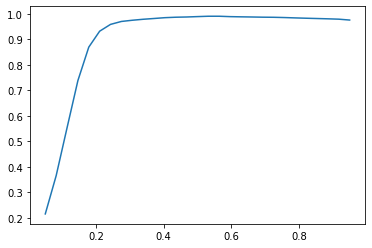

In [ ]:
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.65)).to_fp16()

learn.fit_one_cycle(3, 5.75e-04)
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(6.91e-5,7e-4))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.975805,0.700171,0.799205,02:12
1,0.884909,0.622455,0.840064,02:13
2,0.833377,0.602991,0.853100,02:15


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.754354,0.581432,0.841494,02:14
1,0.691740,0.478642,0.916216,02:12
2,0.622549,0.403245,0.969157,02:13
3,0.571006,0.388411,0.975199,02:13


In [ ]:
def get_ys(r): 
  return (r.parent.name).split(' ')
#torch.device('cpu')
#defaults.device = torch.device('cpu')
file = open("/content/gdrive/MyDrive/data/esp32cam/finalized_model4",'rb')
#learn = pickle.load(file)
#torch.load(file,map_location=torch.device('cpu'))
learn2=load_learner(file, cpu=True)

In [ ]:
# Exporting module is very tricky here:
#if module not exporting giving error function name does not match __main__.get_y
#use:
#learn.save(filename)
#learn.load(filename)  --finally
#learn.export(filename)

import pickle
#torch.cuda.set_device = torch.device('cpu')
filename = '/content/gdrive/MyDrive/data/esp32cam/finalized_model10'
#pickle.dump(learn, open('/content/gdrive/MyDrive/data/esp32cam/'+filename, 'wb'))
learn.export(filename)


In [ ]:
path=Path("/content/drive/MyDrive/data/esp32cam")


In [ ]:
test=get_image_files("/content/gdrive/MyDrive/data/esp32cam/test")

In [ ]:
len(test)

20

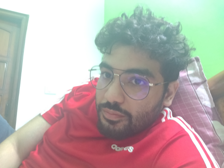

In [ ]:
img=PILImage.create(test[19]).to_thumb(224)
img

In [ ]:
predsi,_,vals=learn2.predict(tensor(img))
for i in torch.where(vals>0.7):
  print(dls.vocab[i])


['ankur']


In [ ]:
learn2.predict(tensor(img))

((#3) ['ankur','meko','zomato'],
 tensor([ True, False, False, False, False, False, False, False,  True, False, False, False, False, False, False, False, False,  True]),
 tensor([0.8415, 0.4161, 0.3436, 0.3408, 0.3782, 0.2159, 0.3706, 0.3538, 0.5563, 0.4529, 0.0592, 0.1206, 0.0820, 0.2588, 0.3328, 0.2699, 0.3161, 0.5377]))

In [ ]:
print(PIL)

NameError: ignored

In [ ]:
len(dls.vocab)

18

In [ ]:
dls.vocab

['ankur', 'chandan', 'courier', 'dhobi', 'ekam', 'garbage-collector', 'goldy', 'maali', 'meko', 'milk-man', 'mom', 'papa', 'sabji', 'sahil', 'sahil_family', 'sanket', 'swiggy', 'zomato']